In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('02-insurance-linear-regression')
jovian.set_colab_id('1sklFpOe7bCQGYe06FqPN0tHfDsfFzw_u')

     |████████████████████████████████| 71kB 3.4MB/s 


# Insurance cost prediction using linear regression

In this project we're going to use information like a person's age, sex, BMI, no. of children and smoking habit to predict the price of yearly medical bills. This kind of model is useful for insurance companies to determine the yearly insurance premium for a person. The dataset for this problem is taken from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).


We will create a model with the following steps:
1. Download and explore the dataset
2. Prepare the dataset for training
3. Create a linear regression model
4. Train the model to fit the data
5. Make predictions using the trained model

In [ ]:
!pip install numpy seaborn matplotlib pandas torch torchvision torchaudio --quiet

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
project_name='02-insurance-linear-regression'

## Step 1: Download and explore the data

Let us begin by downloading the data. We'll use the `download_url` function from PyTorch to get the data as a CSV (comma-separated values) file. 

In [ ]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
DATA_FILENAME = "insurance.csv"
download_url(DATASET_URL, '.')

Using downloaded and verified file: ./insurance.csv


To load the dataset into memory, we'll use the `read_csv` function from the `pandas` library. The data will be loaded as a Pandas dataframe. See this short tutorial to learn more: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [ ]:
dataframe_raw = pd.read_csv(DATA_FILENAME)
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to do a slight customization of the data, so that you every participant receives a slightly different version of the dataset. Fill in your name below as a string (enter at least 5 characters)

In [ ]:
your_name = 'aswini' # at least 5 characters

The `customize_dataset` function will customize the dataset slightly using your name as a source of random numbers.

In [ ]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi * ord(rand_str[1])/100.
    # scale target
    dataframe.charges = dataframe.charges * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe

In [ ]:
dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,charges
27,55,female,37.69125,2,no,14599.672378
997,63,female,42.37750,0,no,16526.682515
162,54,male,45.54000,1,no,12436.156880
824,60,male,27.96800,0,no,14903.089712
392,48,male,36.16175,1,no,10667.232055


Let us explore the dataset. 


No. of observations in the dataset:

In [ ]:
num_rows = len(dataframe)
print(num_rows)

1271


No. of variables in the dataset:

In [ ]:
num_cols = len(dataframe.columns)
print(num_cols)

6


Input variables:

In [ ]:
input_df= dataframe[dataframe.columns[:-1]]
#input_cols.head()
input_cols = []
for col in input_df.columns: 
     input_cols.append(col) 
list(input_cols)


['age', 'sex', 'bmi', 'children', 'smoker']

Categorial variables:

In [ ]:
#categorical_cols = input_cols.copy(deep=True)
#for cols in categorical_cols.columns:
#    if categorical_cols[cols].dtype !='O':
#        categorical_cols=categorical_cols.drop([cols], axis=1)
#categorical_cols.head()

categorical_cols =[]
for cols in input_df.columns:
    if input_df[cols].dtype =='O':
        categorical_cols.append(cols)
list(categorical_cols)        

['sex', 'smoker']

Column titles of target variables:

In [ ]:
#output_cols=dataframe[dataframe.columns[-1]]
#output_cols=output_cols.to_frame()
#output_cols.head()

output_cols= [dataframe.columns[-1]]
output_cols

['charges']

Minimum, maximum and average value of the `charges` column:

In [ ]:
target_describe=dataframe[output_cols].describe()
target_describe

,charges
count,1271.000000
mean,15843.892414
std,14481.746424
min,1335.029941
25%,5655.300546
50%,11175.701740
75%,19579.428517
max,75886.809332


In [ ]:
print('Min '+ str(target_describe.loc['min','charges'])+ '\nMax ' +str(target_describe.loc['max','charges'])+
     '\nAverage ' + str(target_describe.loc['mean','charges']));

Min 1335.029941
Max 75886.8093319
Average 15843.892413833843


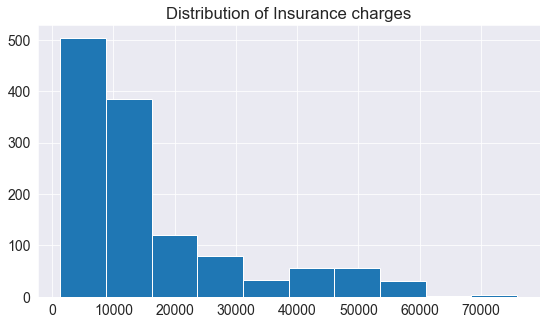

In [ ]:
import seaborn as sns
# Configuring styles
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.title("Distribution of Insurance charges")
plt.hist(dataframe[output_cols]);

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aswiniabraham/02-insurance-linear-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aswiniabraham/02-insurance-linear-regression


'https://jovian.ai/aswiniabraham/02-insurance-linear-regression'

## Step 2: Prepare the dataset for training

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. If you've filled out `input_cols`, `categorial_cols` and `output_cols` correctly, this following function will perform the conversion to numpy arrays.

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [ ]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")

In [ ]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
s.cat

In [ ]:
s.cat.codes

0    0
1    1
2    2
3    0
dtype: int8

Read through the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to understand how we're converting categorical variables into numbers.

In [ ]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[55.     ,  0.     , 37.69125,  2.     ,  0.     ],
        [63.     ,  0.     , 42.3775 ,  0.     ,  0.     ],
        [54.     ,  1.     , 45.54   ,  1.     ,  0.     ],
        ...,
        [58.     ,  1.     , 36.8115 ,  1.     ,  0.     ],
        [32.     ,  0.     , 50.853  ,  0.     ,  0.     ],
        [35.     ,  1.     , 20.539  ,  1.     ,  0.     ]]),
 array([[14599.6723775],
        [16526.682515 ],
        [12436.15688  ],
        ...,
        [14216.484821 ],
        [ 4753.071582 ],
        [ 6088.635476 ]]))

**Q: Convert the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.**

In [ ]:
inputs = torch.from_numpy(inputs_array).float()
targets = torch.from_numpy(targets_array).float()

In [ ]:
#inputs=inputs.to(dtype=torch.float32)
#targets=targets.to(dtype=torch.float32)
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

Next, we need to create PyTorch datasets & data loaders for training & validation. We'll start by creating a `TensorDataset`.

In [ ]:
dataset = TensorDataset(inputs, targets)
len(dataset)

1271

TensorDataset helps in wrapping the tensors into a dataset. [Source](https://pytorch.org/docs/stable/data.html). This helps to 
* Create a source dataset from your input data.
* Apply dataset transformations to preprocess the data.
* Iterate over the dataset and process the elements.
[Source](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

**Q: Pick a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then use `random_split` to create training & validation datasets.**

In [ ]:
val_percent = 0.2 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

Finally, we can create data loaders for training & validation.

**Q: Pick a batch size for the data loader.**

In [ ]:
batch_size = 50

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[55.0000,  0.0000, 40.4800,  0.0000,  1.0000],
        [52.0000,  0.0000, 43.1538,  2.0000,  0.0000],
        [21.0000,  0.0000, 37.5820,  2.0000,  0.0000],
        [27.0000,  0.0000, 36.1100,  0.0000,  1.0000],
        [40.0000,  1.0000, 35.5062,  4.0000,  0.0000],
        [59.0000,  0.0000, 40.0200,  2.0000,  0.0000],
        [59.0000,  1.0000, 33.1027,  0.0000,  0.0000],
        [20.0000,  1.0000, 25.3000,  1.0000,  0.0000],
        [56.0000,  0.0000, 48.1965,  0.0000,  0.0000],
        [23.0000,  0.0000, 38.4100,  0.0000,  0.0000],
        [38.0000,  0.0000, 31.3547,  1.0000,  0.0000],
        [31.0000,  0.0000, 29.6700,  2.0000,  0.0000],
        [49.0000,  1.0000, 36.0525,  1.0000,  0.0000],
        [44.0000,  1.0000, 35.2935,  2.0000,  0.0000],
        [24.0000,  0.0000, 23.5980,  0.0000,  1.0000],
        [33.0000,  1.0000, 40.5317,  0.0000,  0.0000],
        [41.0000,  1.0000, 46.2990,  0.0000,  0.0000],
        [26.0000,  1.0000, 33.8675,  0.0000,  0.0000],
  

Let's save our work by committing to Jovian.

In [ ]:
jovian.commit(project='02-insurance-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Step 3: Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression (we'll build more complex models in the next assignment). 


In [ ]:
input_size = len(input_cols)
output_size = len(output_cols)

**Q: Complete the class definition below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.**

Hint: Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions

In [ ]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                           # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                           # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 40th epoch
        if (epoch+1) % 40 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

Let us create a model using the `InsuranceModel` class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [ ]:
model = InsuranceModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2282,  0.4011, -0.2064, -0.0902, -0.2324]], requires_grad=True),
 Parameter containing:
 tensor([-0.2319], requires_grad=True)]

One final commit before we train the model.

In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aswiniabraham/02-insurance-linear-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/aswiniabraham/02-insurance-linear-regression


'https://jovian.ai/aswiniabraham/02-insurance-linear-regression'

## Step 4: Train the model to fit the data

To train our model, we'll use the same `fit` function explained in the lecture. That's the benefit of defining a generic training loop - you can use it for any problem.

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
    
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Use the `evaluate` function to calculate the loss on the validation set before training.**

In [ ]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 17257.974609375}



We are now ready to train the model. You may need to run the training loop many times, for different number of epochs and with different learning rates, to get a good result. Also, if your loss becomes too large (or `nan`), you may have to re-initialize the model by running the cell `model = InsuranceModel()`. Experiment with this for a while, and try to get to as low a loss as possible.

**Train the model with different learning rates & for different number of epochs.**

Hint: Vary learning rates by orders of 10 (e.g. `1e-2`, `1e-3`, `1e-4`, `1e-5`, `1e-6`) to figure out what works.

In [ ]:
epochs = 1000
lr = 1e-5
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 17234.7031
Epoch [80], val_loss: 17211.4316
Epoch [120], val_loss: 17188.1484
Epoch [160], val_loss: 17164.8750
Epoch [200], val_loss: 17141.5918
Epoch [240], val_loss: 17118.3105
Epoch [280], val_loss: 17095.0371
Epoch [320], val_loss: 17071.7598
Epoch [360], val_loss: 17048.4688
Epoch [400], val_loss: 17025.1875
Epoch [440], val_loss: 17001.9160
Epoch [480], val_loss: 16978.6348
Epoch [520], val_loss: 16955.3496
Epoch [560], val_loss: 16932.0703
Epoch [600], val_loss: 16908.7930
Epoch [640], val_loss: 16885.5137
Epoch [680], val_loss: 16862.2363
Epoch [720], val_loss: 16838.9551
Epoch [760], val_loss: 16815.6738
Epoch [800], val_loss: 16792.3965
Epoch [840], val_loss: 16769.1152
Epoch [880], val_loss: 16745.8457
Epoch [920], val_loss: 16722.5684
Epoch [960], val_loss: 16699.2988
Epoch [1000], val_loss: 16676.0176


In [ ]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 14410.9531
Epoch [80], val_loss: 12882.5752
Epoch [120], val_loss: 11854.9648
Epoch [160], val_loss: 11233.0781
Epoch [200], val_loss: 10874.3555
Epoch [240], val_loss: 10683.7285
Epoch [280], val_loss: 10578.6221
Epoch [320], val_loss: 10516.7451
Epoch [360], val_loss: 10474.0898
Epoch [400], val_loss: 10443.2188
Epoch [440], val_loss: 10417.3877
Epoch [480], val_loss: 10397.2588
Epoch [520], val_loss: 10380.9707
Epoch [560], val_loss: 10365.9893
Epoch [600], val_loss: 10351.0586
Epoch [640], val_loss: 10336.3604
Epoch [680], val_loss: 10322.3945
Epoch [720], val_loss: 10308.7344
Epoch [760], val_loss: 10295.4082
Epoch [800], val_loss: 10282.2568
Epoch [840], val_loss: 10268.8994
Epoch [880], val_loss: 10255.8135
Epoch [920], val_loss: 10243.7021
Epoch [960], val_loss: 10231.1602
Epoch [1000], val_loss: 10218.0400


In [ ]:
epochs = 1000
lr = 1e-2
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 10098.5674
Epoch [80], val_loss: 9992.9619
Epoch [120], val_loss: 9892.9277
Epoch [160], val_loss: 9818.1064
Epoch [200], val_loss: 9764.2549
Epoch [240], val_loss: 9724.1494
Epoch [280], val_loss: 9701.4209
Epoch [320], val_loss: 9689.0654
Epoch [360], val_loss: 9683.2578
Epoch [400], val_loss: 9679.2725
Epoch [440], val_loss: 9674.6719
Epoch [480], val_loss: 9671.4688
Epoch [520], val_loss: 9670.3223
Epoch [560], val_loss: 9666.6787
Epoch [600], val_loss: 9666.9053
Epoch [640], val_loss: 9665.1885
Epoch [680], val_loss: 9662.7080
Epoch [720], val_loss: 9660.9502
Epoch [760], val_loss: 9659.8350
Epoch [800], val_loss: 9659.2705
Epoch [840], val_loss: 9656.1523
Epoch [880], val_loss: 9656.9600
Epoch [920], val_loss: 9655.2803
Epoch [960], val_loss: 9652.4014
Epoch [1000], val_loss: 9653.4365


In [ ]:
epochs = 1000
lr = 1e-1
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9627.0469
Epoch [80], val_loss: 9621.4932
Epoch [120], val_loss: 9615.0410
Epoch [160], val_loss: 9610.4756
Epoch [200], val_loss: 9593.5068
Epoch [240], val_loss: 9593.8662
Epoch [280], val_loss: 9582.4209
Epoch [320], val_loss: 9563.8955
Epoch [360], val_loss: 9571.3105
Epoch [400], val_loss: 9549.2451
Epoch [440], val_loss: 9542.2686
Epoch [480], val_loss: 9530.9697
Epoch [520], val_loss: 9529.0322
Epoch [560], val_loss: 9521.8779
Epoch [600], val_loss: 9512.4678
Epoch [640], val_loss: 9506.3564
Epoch [680], val_loss: 9516.5801
Epoch [720], val_loss: 9490.8838
Epoch [760], val_loss: 9483.0850
Epoch [800], val_loss: 9477.9873
Epoch [840], val_loss: 9480.5400
Epoch [880], val_loss: 9464.5850
Epoch [920], val_loss: 9470.4648
Epoch [960], val_loss: 9459.9277
Epoch [1000], val_loss: 9447.1025


In [ ]:
epochs = 1000
lr = 1e-2
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9449.1514
Epoch [80], val_loss: 9448.1807
Epoch [120], val_loss: 9446.8740
Epoch [160], val_loss: 9447.2197
Epoch [200], val_loss: 9446.5342
Epoch [240], val_loss: 9445.5137
Epoch [280], val_loss: 9445.2490
Epoch [320], val_loss: 9444.5146
Epoch [360], val_loss: 9444.6299
Epoch [400], val_loss: 9444.2578
Epoch [440], val_loss: 9442.7910
Epoch [480], val_loss: 9442.1416
Epoch [520], val_loss: 9442.2939
Epoch [560], val_loss: 9440.8213
Epoch [600], val_loss: 9440.4658
Epoch [640], val_loss: 9439.9268
Epoch [680], val_loss: 9439.8545
Epoch [720], val_loss: 9438.6826
Epoch [760], val_loss: 9438.7852
Epoch [800], val_loss: 9438.2412
Epoch [840], val_loss: 9437.1357
Epoch [880], val_loss: 9436.8545
Epoch [920], val_loss: 9435.0967
Epoch [960], val_loss: 9435.2861
Epoch [1000], val_loss: 9433.9023


In [ ]:
epochs = 1000
lr = 1e-3
history6 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9434.2842
Epoch [80], val_loss: 9434.4229
Epoch [120], val_loss: 9434.4736
Epoch [160], val_loss: 9434.6689
Epoch [200], val_loss: 9434.5713
Epoch [240], val_loss: 9434.4502
Epoch [280], val_loss: 9434.6494
Epoch [320], val_loss: 9434.5068
Epoch [360], val_loss: 9434.5049
Epoch [400], val_loss: 9434.3877
Epoch [440], val_loss: 9434.5117
Epoch [480], val_loss: 9434.2793
Epoch [520], val_loss: 9434.2783
Epoch [560], val_loss: 9434.2686
Epoch [600], val_loss: 9434.2002
Epoch [640], val_loss: 9434.2275
Epoch [680], val_loss: 9434.1768
Epoch [720], val_loss: 9433.9854
Epoch [760], val_loss: 9434.0625
Epoch [800], val_loss: 9433.9180
Epoch [840], val_loss: 9433.8564
Epoch [880], val_loss: 9433.9072
Epoch [920], val_loss: 9433.8184
Epoch [960], val_loss: 9433.7148
Epoch [1000], val_loss: 9433.7158


In [ ]:
epochs =500 
lr = 1e-2
history7 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9432.9756
Epoch [80], val_loss: 9432.3096
Epoch [120], val_loss: 9431.2109
Epoch [160], val_loss: 9431.7451
Epoch [200], val_loss: 9430.3486
Epoch [240], val_loss: 9429.7070
Epoch [280], val_loss: 9429.5596
Epoch [320], val_loss: 9428.8877
Epoch [360], val_loss: 9428.0283
Epoch [400], val_loss: 9427.1553
Epoch [440], val_loss: 9426.6426
Epoch [480], val_loss: 9426.3262
Epoch [500], val_loss: 9426.5693


In [ ]:
epochs =500 
lr = 1e-1
history8 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9352.5869
Epoch [80], val_loss: 9351.9873
Epoch [120], val_loss: 9342.4570
Epoch [160], val_loss: 9338.5264
Epoch [200], val_loss: 9333.0781
Epoch [240], val_loss: 9327.1201
Epoch [280], val_loss: 9332.3408
Epoch [320], val_loss: 9318.6758
Epoch [360], val_loss: 9312.7705
Epoch [400], val_loss: 9308.9639
Epoch [440], val_loss: 9302.7471
Epoch [480], val_loss: 9297.2666
Epoch [500], val_loss: 9294.8096


In [ ]:
epochs =1000 
lr = 1e-1
history9 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9290.7998
Epoch [80], val_loss: 9287.1982
Epoch [120], val_loss: 9283.2354
Epoch [160], val_loss: 9275.9404
Epoch [200], val_loss: 9272.7949
Epoch [240], val_loss: 9265.5693
Epoch [280], val_loss: 9261.3994
Epoch [320], val_loss: 9273.7764
Epoch [360], val_loss: 9256.1895
Epoch [400], val_loss: 9248.0205
Epoch [440], val_loss: 9240.4717
Epoch [480], val_loss: 9236.1777
Epoch [520], val_loss: 9233.4463
Epoch [560], val_loss: 9226.5635
Epoch [600], val_loss: 9221.5088
Epoch [640], val_loss: 9223.8682
Epoch [680], val_loss: 9211.8662
Epoch [720], val_loss: 9213.3486
Epoch [760], val_loss: 9203.4375
Epoch [800], val_loss: 9203.3330
Epoch [840], val_loss: 9193.3086
Epoch [880], val_loss: 9188.3135
Epoch [920], val_loss: 9185.2344
Epoch [960], val_loss: 9177.5752
Epoch [1000], val_loss: 9176.6201


In [ ]:
epochs =500 
lr = 5e-1
history10 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 9361.7959
Epoch [80], val_loss: 9245.8516
Epoch [120], val_loss: 9098.5029
Epoch [160], val_loss: 9082.7666
Epoch [200], val_loss: 9054.8945
Epoch [240], val_loss: 9040.5029
Epoch [280], val_loss: 9030.3193
Epoch [320], val_loss: 9014.8164
Epoch [360], val_loss: 8989.2842
Epoch [400], val_loss: 8957.3701
Epoch [440], val_loss: 8927.1602
Epoch [480], val_loss: 8912.8369
Epoch [500], val_loss: 8922.5898


In [ ]:
epochs =1000 
lr = 6e-1
history11 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 8855.8193
Epoch [80], val_loss: 9038.0068
Epoch [120], val_loss: 8798.7432
Epoch [160], val_loss: 8951.8213
Epoch [200], val_loss: 8756.0420
Epoch [240], val_loss: 8718.3350
Epoch [280], val_loss: 8696.2354
Epoch [320], val_loss: 8671.7490
Epoch [360], val_loss: 8661.6318
Epoch [400], val_loss: 8623.2773
Epoch [440], val_loss: 8587.1611
Epoch [480], val_loss: 8552.2334
Epoch [520], val_loss: 8606.3115
Epoch [560], val_loss: 8497.7822
Epoch [600], val_loss: 8746.6279
Epoch [640], val_loss: 8448.5576
Epoch [680], val_loss: 8439.2803
Epoch [720], val_loss: 8386.8389
Epoch [760], val_loss: 8396.0938
Epoch [800], val_loss: 8397.1689
Epoch [840], val_loss: 8303.8135
Epoch [880], val_loss: 8325.6016
Epoch [920], val_loss: 8251.7334
Epoch [960], val_loss: 8240.0479
Epoch [1000], val_loss: 8235.1758


In [ ]:
epochs =1000 
lr = 5e-1
history12 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 8176.1968
Epoch [80], val_loss: 8178.0835
Epoch [120], val_loss: 8132.1489
Epoch [160], val_loss: 8143.4434
Epoch [200], val_loss: 8091.0327
Epoch [240], val_loss: 8076.8970
Epoch [280], val_loss: 8047.4688
Epoch [320], val_loss: 8021.5757
Epoch [360], val_loss: 8039.5156
Epoch [400], val_loss: 8019.0410
Epoch [440], val_loss: 7944.7637
Epoch [480], val_loss: 7923.2075
Epoch [520], val_loss: 7907.2603
Epoch [560], val_loss: 7879.4082
Epoch [600], val_loss: 7859.1011
Epoch [640], val_loss: 7838.7661
Epoch [680], val_loss: 7818.1406
Epoch [720], val_loss: 7791.2319
Epoch [760], val_loss: 7770.0996
Epoch [800], val_loss: 7759.1987
Epoch [840], val_loss: 7793.8892
Epoch [880], val_loss: 7707.3589
Epoch [920], val_loss: 7693.9355
Epoch [960], val_loss: 7679.1445
Epoch [1000], val_loss: 7639.5327


In [ ]:
epochs =5000 
lr = 5e-1
history13 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [40], val_loss: 7615.4038
Epoch [80], val_loss: 7666.2593
Epoch [120], val_loss: 7569.9819
Epoch [160], val_loss: 7553.0962
Epoch [200], val_loss: 7521.2637
Epoch [240], val_loss: 7510.5884
Epoch [280], val_loss: 7555.6216
Epoch [320], val_loss: 7452.0054
Epoch [360], val_loss: 7447.7051
Epoch [400], val_loss: 7466.6704
Epoch [440], val_loss: 7436.1548
Epoch [480], val_loss: 7430.2007
Epoch [520], val_loss: 7341.5728
Epoch [560], val_loss: 7455.9609
Epoch [600], val_loss: 7297.9961
Epoch [640], val_loss: 7274.5161
Epoch [680], val_loss: 7268.1934
Epoch [720], val_loss: 7230.8345
Epoch [760], val_loss: 7209.8120
Epoch [800], val_loss: 7207.6895
Epoch [840], val_loss: 7170.2476
Epoch [880], val_loss: 7142.8374
Epoch [920], val_loss: 7166.4409
Epoch [960], val_loss: 7097.9243
Epoch [1000], val_loss: 7081.7417
Epoch [1040], val_loss: 7052.4414
Epoch [1080], val_loss: 7031.0825
Epoch [1120], val_loss: 7023.2363
Epoch [1160], val_loss: 6989.4136
Epoch [1200], val_loss: 7027.8496
Epoch 

Final validation loss of the model:

In [ ]:
history=history1+history2+history3+history4+history5+history6+history7+history8+history9+history10+history11+history12+history13
val_loss = history[-1]
print(val_loss)

{'val_loss': 5598.29541015625}


Let's log the final validation loss to Jovian and commit the notebook

In [ ]:
jovian.log_metrics(val_loss=val_loss)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aswiniabraham/02-insurance-linear-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/aswiniabraham/02-insurance-linear-regression


'https://jovian.ai/aswiniabraham/02-insurance-linear-regression'

## Step 5: Make predictions using the trained model

**Make predictions on a single input**

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([20.0000,  0.0000, 33.3213,  0.0000,  0.0000])
Target: tensor([2686.3955])
Prediction: tensor([3004.3621])


In [ ]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([37.0000,  1.0000, 35.4200,  0.0000,  0.0000])
Target: tensor([5529.6431])
Prediction: tensor([7873.6797])


In [ ]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([55.0000,  0.0000, 34.6610,  2.0000,  0.0000])
Target: tensor([14139.5439])
Prediction: tensor([14984.4580])


## References:

1. Zero to pandas course, Jovian (https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)

In [5]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/aswiniabraham/02-insurance-linear-regression


'https://jovian.ai/aswiniabraham/02-insurance-linear-regression'